In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x=pd.read_csv('E-commerce Website Logs (1).csv')
x

/tmp/ipython-input-2976508372.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  x=pd.read_csv('E-commerce Website Logs (1).csv')


,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.00,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.00,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1115198107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.00,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1121152143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.00,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1123135213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22368.0000,No,0.00,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172833,2017-03-16 11:42:01.298,4372,TCP,94197121229,100600,Android App,NaN,Male,US,Normal,English,0.0000,Yes,143.36,Debit Card
172834,2017-03-16 12:10:17.340,2167,TCP,129.110.241.72,30400,Android App,NaN,Female,IT,Normal,English,15.1500,No,0.00,Cash
172835,2017-03-16 12:10:17.340,2725,TCP,185119252121,100300,Android App,NaN,Female,IT,Normal,English,600.1600,No,0.00,Credit Card
172836,2017-03-16 15:52:58.342,3728,TCP,185.145.107.23,50200,Android App,NaN,Male,US,Normal,Russian,75.7500,No,0.00,Cash


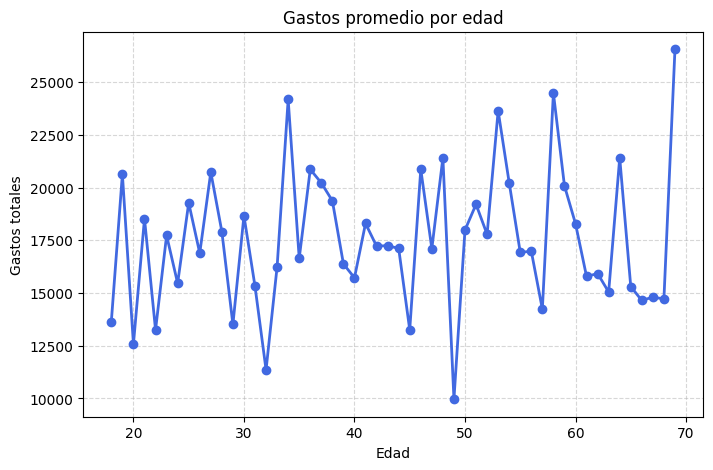

In [ ]:


#exporta el dataset de su carpta pasandolo a formato numpy espaciandolo con comillas y pasandolo a string
data = np.genfromtxt('E-commerce Website Logs (1).csv', delimiter=',', dtype=str)
#guarda la primera fila donde se encuentran las cabeceras en headers
headers = data[0]
#guarda el resto de filas de segunda a la ultima
rows = data[1:]
#guarda las filas sin "" o -- en filtradas(una lista) para que no de errores
filtradas = [fila for fila in rows if fila[6] != '--' and fila[6] != ""]
#convierte filtradas en un array de numpy
filtradas = np.array(filtradas)
#guarda los valores en posicion 7(edades) en x pasandolos a float(aunque en este caso no era realmente necesario)
x = filtradas[:, 6].astype(float)
#guarda los valores en posicion 12(gastos promedio) en y pasandolos a float
y = filtradas[:, 11].astype(float)
#guarda en edades_unicas los valores no repetidos en x
edades_unicas = np.unique(x)
#guarda en duracion_promedio la media de y(duracion) para cada valor en edades unicas, primero guardando en x un array con true o false segun si es la misma edad
#y despues haciendo la media de los valores que lo cumplen
duracion_promedio = np.array([y[x == edad].mean() for edad in edades_unicas])
#determina el tamaño del grafico
plt.figure(figsize=(8,5))
#crea el grafico de lineas x,y,color,como se ven las zonas marcadas, anchura lineas
plt.plot(edades_unicas, duracion_promedio, color="royalblue", marker="o", linewidth=2)
plt.xlabel("Edad")
plt.ylabel("Gastos totales")
plt.title("Gastos promedio por edad")
# para crear las lineas de cudricula semitransparentes
plt.grid(True, linestyle="--", alpha=0.5)
#mostrar grafico
plt.show()

Protocolos detectados en el CSV: ['HTTP' 'ICMP' 'TCP' 'UDP']


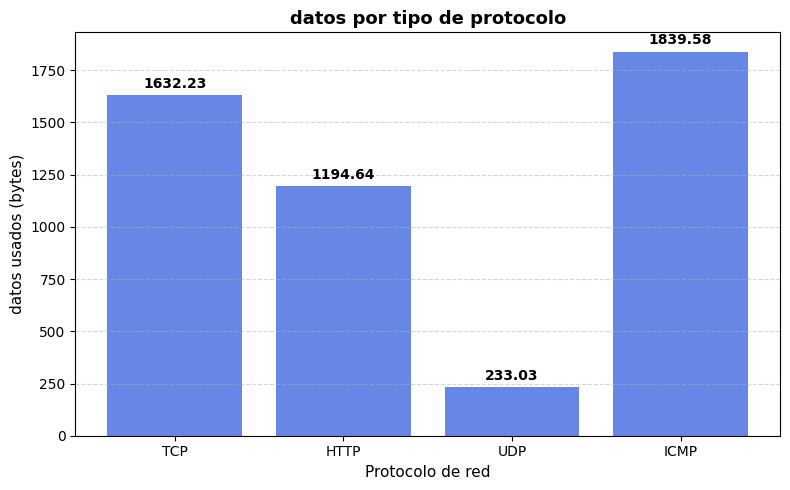

In [ ]:





# lo mismo que en el anterior extrae el csv a una array
data = np.genfromtxt('E-commerce Website Logs (1).csv', delimiter=',', dtype=str, skip_header=1)

# filtra filas con \xa0
data = np.char.strip(data)
data = np.char.replace(data, '\xa0', '')

#recoge los valores no repetidos en protocolos
protocolos_detectados = np.unique(data[:, 2])
print("Protocolos detectados en el CSV:", protocolos_detectados)

# guarda en una lista los protocolos con los que vamos a trbajar
protocolos_objetivo = ['TCP', 'HTTP', 'UDP', 'ICMP']

duraciones_promedio = []

# este bucle DE SOLO 4 REPETICIONES(muy cor)crea una lista para cada protocolo objetivo con valores true cuando coincide y false cuando se trata de otro
# despues guarda en otra lista las filas con valor true y en caso de tener al menos una fila hace su media de datos usados
# en caso de tener 0 filas da 9 de duracion media directamente para que el .mean() no de errores
# finalmente guarda el valor de la duracion media en duraciones_promedio

for protocolo in protocolos_objetivo:

    mask = np.char.upper(data[:, 2]) == protocolo.upper()
    filas_filtradas = data[mask]

    if len(filas_filtradas) > 0:

        duraciones = filas_filtradas[:, 4].astype(float)
        duracion_media = np.mean(duraciones)
    else:
        duracion_media = 0.0

    duraciones_promedio.append(duracion_media)

# le da el tamaño al grafico
plt.figure(figsize=(8, 5))
# crea el grafico x,y,color,color mas transparente
bars = plt.bar(protocolos_objetivo, duraciones_promedio, color="royalblue", alpha=0.8)
#le da el valor a las barras delgrafico poniendo el valor que contienen
plt.bar_label(bars, fmt="%.2f", label_type="edge", padding=3, fontsize=10, fontweight='bold')




plt.xlabel("Protocolo de red", fontsize=11)
plt.ylabel("datos usados (bytes)", fontsize=11)
plt.title("datos por tipo de protocolo", fontsize=13, weight='bold')
# crea las lineas de cuadricula y las pone semitransparentes
plt.grid(axis="y", linestyle="--", alpha=0.5)
#ajusta el grafico para que se vea limpio
plt.tight_layout()
plt.show()


/tmp/ipython-input-3337397342.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


[6.83255279e+08 4.37902131e+08 2.27105771e+08 1.77147716e+08]


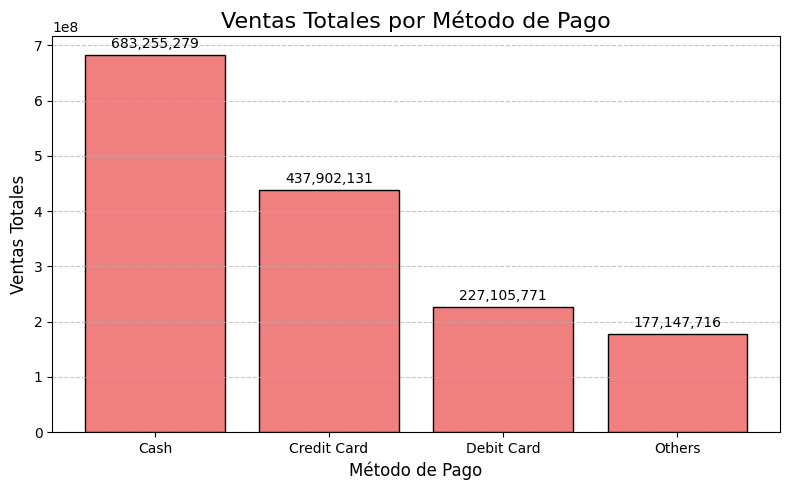

In [ ]:
#file_path = ...: ruta al archivo CSV en el entorno (ya me lo subiste).
#df = pd.read_csv(file_path): lee el CSV y devuelve un DataFrame de pandas. Lo usamos únicamente

file_path = "E-commerce Website Logs (1).csv"
df = pd.read_csv(file_path)

#df['pay_method']: accede a la columna de método de pago.
#.dropna(): elimina filas donde pay_method es NaN (nulos). Esto evita problemas al agrupar por métodos de pago faltantes.
#.to_numpy(): convierte la columna de pandas a un numpy.ndarray (array de NumPy). A partir de aquí trabajamos con NumPy puro.
#En sales = df.loc[df['pay_method'].notna(), 'sales'].to_numpy():
#df['pay_method'].notna() crea una máscara booleana que es True sólo donde pay_method no está vacío.
#df.loc[mask, 'sales'] selecciona las filas de sales que corresponden a métodos de pago presentes (para que los arrays pay_method y sales estén alineados).
#.to_numpy() convierte esa selección a array NumPy.
#Importante: hacemos esto para que pay_method y sales tengan la misma longitud y correspondan elemento a elemento.

# Convertir las columnas relevantes a arrays de NumPy
pay_method = df['pay_method'].dropna().to_numpy()
sales = df.loc[df['pay_method'].notna(), 'sales'].to_numpy()

#Convierte el array sales a tipo float. Es importante porque puede haber valores como strings, o comas, etc.
#Si hay valores no convertibles, esto fallará; una alternativa robusta es usar pd.to_numeric(df['sales'], errors='coerce') en la fase de lectura para convertir errores a NaN y luego filtrar.

# Asegurar que ventas son numéricas
sales = sales.astype(float)

#np.unique(pay_method) devuelve los valores únicos en pay_method ordenados (p. ej. ['Cash', 'Credit Card', 'Debit Card']).
#return_inverse=True hace que la función también devuelva indices: un array de la misma longitud que pay_method con la posición (índice) del valor único correspondiente para cada fila.
#Ejemplo: si methods = ['Cash', 'Credit Card', 'Debit Card'] y la fila 0 tiene 'Debit Card', entonces indices[0] == 2.
#Con esto evitamos bucles por string: indices nos permite agrupar por entero (índices enteros), lo cual NumPy maneja muy bien.

# --- Agrupar y sumar con NumPy ---
methods, indices = np.unique(pay_method, return_inverse=True)

#np.bincount(indices, weights=sales) suma los weights (aquí sales) para cada valor de indices.
#indices debe ser enteros no negativos (lo es porque viene de return_inverse).
#Resultado: array sales_totals donde sales_totals[i] = suma de sales para methods[i].
#Ventaja: es muy rápido y 100% vectorizado (sin bucles explícitos en Python).
#Nota: np.bincount devuelve un array de longitud max(indices)+1. En nuestro caso cubre exactamente el número de methods.

sales_totals = np.bincount(indices, weights=sales)
print (sales_totals)
# Ordenar de mayor a menor
#np.argsort(...) devuelve los índices que ordenarían el array sales_totals.
#Al anteponer -sales_totals se invierte el signo, por lo que argsort dará el orden para de mayor a menor (en vez de ascendente).
#Resultado: order es un array de índices que reordena sales_totals de mayor a menor.
order = np.argsort(-sales_totals)

#Reordena el array (o lista/serie) methods usando los índices en order.
#Así methods[i] queda alineado con el sales_totals reordenado (mismo orden descendente).
methods = methods[order]

#Reordena sales_totals con el mismo order para que ambos (métodos y totales) estén sincronizados en orden descendente.
sales_totals = sales_totals[order]


# --- Visualización ---
#Crea una nueva figura de matplotlib con tamaño 8 x 5 pulgadas.
#Esto controla el espacio donde se dibujará el gráfico.
plt.figure(figsize=(8,5))

#Dibuja un gráfico de barras con methods en el eje x y sales_totals en el eje y.
#color='lightcoral' define el color de relleno de las barras.
#edgecolor='black' dibuja el borde de cada barra en negro.
#La variable bars guarda los objetos de barra (BarContainer) — útil para etiquetar o modificar las barras después.
bars = plt.bar(methods, sales_totals, color='lightcoral', edgecolor='black')

#plt.bar_label(...) añade etiquetas con valores encima (o dentro) de cada barra.
#bars es el contenedor de barras al que se aplican las etiquetas.
#labels=[f'{x:, .0f}' for x in sales_totals] construye una lista de cadenas formateadas para cada total:
#f'{x:, .0f}' formatea x sin decimales y con separador de miles (ej.: 1,234). (Nota: el espacio después de la coma en la imagen puede ser un typo; normalmente f'{x:,.0f}'.)
#padding=3 separa la etiqueta de la barra unos píxeles.
#fontsize=10 define el tamaño de letra de las etiquetas.
plt.bar_label(bars, labels=[f'{x:,.0f}' for x in sales_totals], padding=3, fontsize=10)
plt.title('Ventas Totales por Método de Pago', fontsize=16)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

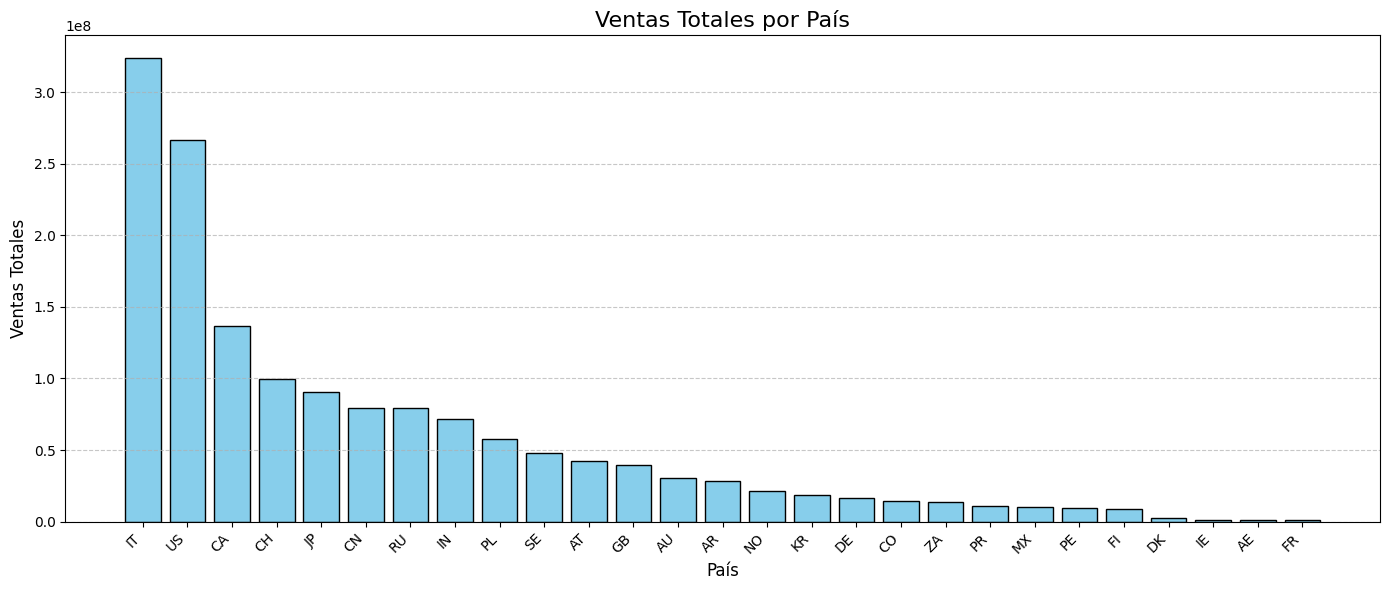

In [ ]:
#delimiter=',' indica que las columnas están separadas por comas.
#dtype=str carga todos los datos como cadenas (texto).
#encoding='utf-8' evita errores con caracteres especiales.
data = np.genfromtxt('E-commerce Website Logs (1).csv', delimiter=',', dtype=str, encoding='utf-8')

# Extraer los encabezados y los datos
#data[0] → contiene los nombres de las columnas.
#data[1:] → contiene todas las filas con información real.
headers = data[0]
data = data[1:]

#Busca la posición (índice) de las columnas 'country' y 'sales' dentro de los encabezados.
#np.where(headers == 'country') devuelve un arreglo con el índice donde aparece la palabra 'country'.
#Ejemplo: si 'country' está en la columna 2 → country_idx = 2.
country_idx = np.where(headers == 'country')[0][0]
sales_idx = np.where(headers == 'sales')[0][0]
# Extraer las columnas necesarias
#countries → columna con los nombres de los países.
#sales → columna con las ventas (convertida a números tipo float, ya que originalmente era texto).
countries = data[:, country_idx]
sales = data[:, sales_idx].astype(float)

#Encuentra todos los países únicos y un índice inverso que indica a qué país pertenece cada fila.
unique_countries, inverse_idx = np.unique(countries, return_inverse=True)

# Sumar las ventas por país usando np.bincount
#inverse_idx asigna a cada venta un índice de país.
#weights=sales hace que np.bincount acumule las ventas según el país correspondiente.
#Es el equivalente de groupby('country')['sales'].sum() en pandas.
sales_totals = np.bincount(inverse_idx, weights=sales)

# Ordenar los resultados de mayor a menor
#np.argsort() devuelve los índices que ordenarían el array.
#[::-1] invierte el orden para que sea descendente.
#Luego se reordenan los países y ventas con esos índices.
sorted_idx = np.argsort(sales_totals)[::-1]
countries_sorted = unique_countries[sorted_idx]
sales_sorted = sales_totals[sorted_idx]

#Visualizar los resultados
plt.figure(figsize=(14,6))
#plt.bar(...): crea las barras, una por país.
plt.bar(countries_sorted, sales_sorted, color='skyblue', edgecolor='black')
plt.title('Ventas Totales por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-767776250.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('E-commerce Website Logs.csv')


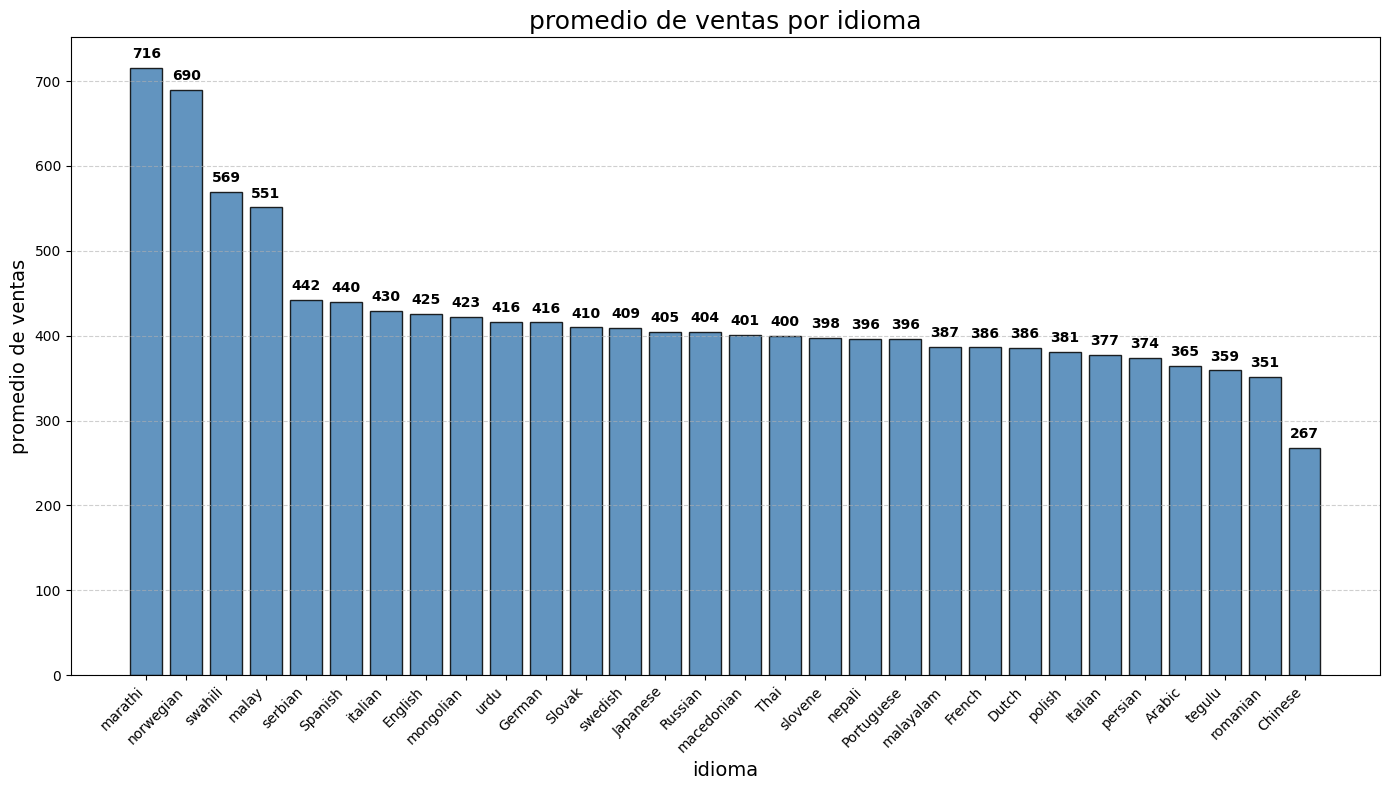


resumen estadístico de ventas por idioma :

    idioma  media  mediana  desviacion  minimo    maximo  n_muestras
   marathi 715.70    99.39    1,467.94    0.00  5,250.00          23
 norwegian 689.70    81.32    1,137.36    0.00  5,250.00         115
   swahili 569.48    40.66    1,030.91    0.00  5,250.00         138
     malay 551.04    82.26    1,076.18    0.00  5,250.00          55
   serbian 442.39    46.05      735.23    0.00  2,400.68          26
   Spanish 440.06    71.68      809.39    0.00  5,443.96       12339
   italian 429.55    46.44      848.92    0.00  5,250.00         583
   English 425.49    46.92      796.92    0.00  5,399.91      117437
 mongolian 422.56    45.45      743.38    0.00  5,250.00         248
      urdu 416.18    71.68      734.35    0.00  3,000.85          82
    German 415.60    54.05      821.63    0.00  5,250.00        2366
    Slovak 409.69    51.72      987.00    0.00  5,250.00         100
   swedish 409.00   107.52      618.74    0.00  3,000.85  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# cargar y normalizar columnas
df = pd.read_csv('E-commerce Website Logs.csv')
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# extraer columnas relevantes
languages = df['language'].to_numpy()
sales = df['sales'].to_numpy()

# obtener idiomas únicos
unique_langs = np.unique(languages)

# calcular estadísticas por idioma con numpy
sales_stats = {
    'mean': np.array([np.mean(sales[languages == lang]) for lang in unique_langs]),
    'median': np.array([np.median(sales[languages == lang]) for lang in unique_langs]),
    'std': np.array([np.std(sales[languages == lang]) for lang in unique_langs]),
    'min': np.array([np.min(sales[languages == lang]) for lang in unique_langs]),
    'max': np.array([np.max(sales[languages == lang]) for lang in unique_langs]),
    'count': np.array([np.count_nonzero(languages == lang) for lang in unique_langs])
}

# ordenar por promedio descendente
sorted_indices = np.argsort(sales_stats['mean'])[::-1]
sorted_langs = unique_langs[sorted_indices]
sorted_avg = sales_stats['mean'][sorted_indices]
sorted_median = sales_stats['median'][sorted_indices]
sorted_std = sales_stats['std'][sorted_indices]
sorted_min = sales_stats['min'][sorted_indices]
sorted_max = sales_stats['max'][sorted_indices]
sorted_count = sales_stats['count'][sorted_indices]

# crear gráfico (solo con el promedio)
plt.figure(figsize=(14,8))
bars = plt.bar(sorted_langs, sorted_avg, color='steelblue', edgecolor='black', alpha=0.85)

# añadir etiquetas con el valor medio
plt.bar_label(
    bars,
    labels=[f'{x:,.0f}' for x in sorted_avg],
    padding=5,
    fontsize=10,
    fontweight='bold'
)

# personalización visual
plt.title('promedio de ventas por idioma', fontsize=18)
plt.xlabel('idioma', fontsize=14)
plt.ylabel('promedio de ventas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# guardar como imagen
plt.savefig('promedio_ventas_idioma_numpy.png')

# mostrar gráfico
plt.show()

# imprimir resumen estadístico (sin mostrarse en el gráfico)
summary = pd.DataFrame({
    'idioma': sorted_langs,
    'media': sorted_avg,
    'mediana': sorted_median, #refleja el valor típico de las ventas
    'desviacion': sorted_std, #mide cuánto varían las ventas dentro de cada idioma. una desviación alta significa que las ventas son muy irregulares
    'minimo': sorted_min,
    'maximo': sorted_max,
    'n_muestras': sorted_count
})

print("\nresumen estadístico de ventas por idioma :\n")
print(summary.to_string(index=False, float_format='{:,.2f}'.format))


/tmp/ipython-input-1875688986.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('E-commerce Website Logs.csv')


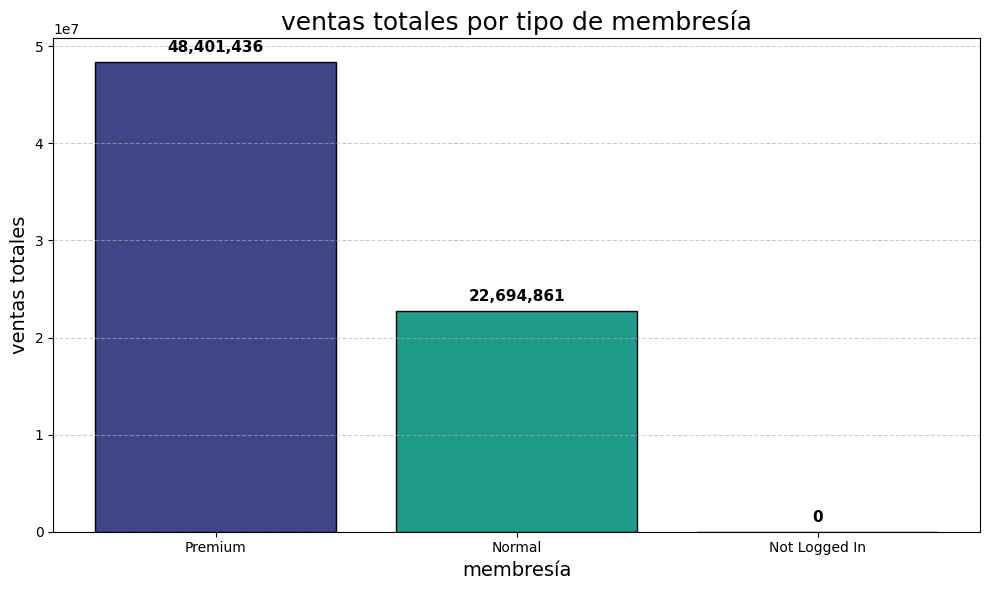


resumen estadístico de ventas por membresía (numpy):

    membresía  ventas_totales  media  mediana  desviacion  minimo    maximo  n_muestras
      Premium   48,401,436.17 450.90    71.98      813.30    0.00 11,199.97      107345
       Normal   22,694,861.35 457.49    75.75      811.73    0.00  5,443.96       49607
Not Logged In            0.00   0.00     0.00        0.00    0.00      0.00       15886


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# cargar y normalizar columnas
df = pd.read_csv('E-commerce Website Logs.csv')
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# extraer columnas relevantes
members = df['membership'].to_numpy()
sales = df['sales'].to_numpy()

# obtener tipos únicos de membresía
unique_members = np.unique(members)

# calcular estadísticas por membresía usando numpy
sales_stats = {
    'total': np.array([np.sum(sales[members == m]) for m in unique_members]),
    'mean': np.array([np.mean(sales[members == m]) for m in unique_members]),
    'median': np.array([np.median(sales[members == m]) for m in unique_members]),
    'std': np.array([np.std(sales[members == m]) for m in unique_members]),
    'min': np.array([np.min(sales[members == m]) for m in unique_members]),
    'max': np.array([np.max(sales[members == m]) for m in unique_members]),
    'count': np.array([np.count_nonzero(members == m) for m in unique_members])
}

# ordenar por ventas totales descendentes
sorted_indices = np.argsort(sales_stats['total'])[::-1]
sorted_members = unique_members[sorted_indices]
sorted_total = sales_stats['total'][sorted_indices]
sorted_mean = sales_stats['mean'][sorted_indices]
sorted_median = sales_stats['median'][sorted_indices]
sorted_std = sales_stats['std'][sorted_indices]
sorted_min = sales_stats['min'][sorted_indices]
sorted_max = sales_stats['max'][sorted_indices]
sorted_count = sales_stats['count'][sorted_indices]

# crear color degradado
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(sorted_total)))

# crear gráfico (solo muestra ventas totales)
plt.figure(figsize=(10,6))
bars = plt.bar(sorted_members, sorted_total, color=colors, edgecolor='black')

# etiquetas con los totales
plt.bar_label(bars, labels=[f'{x:,.0f}' for x in sorted_total], padding=5, fontsize=11, fontweight='bold')

# personalización visual
plt.title('ventas totales por tipo de membresía', fontsize=18)
plt.xlabel('membresía', fontsize=14)
plt.ylabel('ventas totales', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# guardar y mostrar gráfico
plt.savefig('ventas_totales_membresia_numpy.png')
plt.show()

# resumen estadístico completo (solo en consola)
summary = pd.DataFrame({
    'membresía': sorted_members,
    'ventas_totales': sorted_total,
    'media': sorted_mean,
    'mediana': sorted_median,
    'desviacion': sorted_std,
    'minimo': sorted_min,
    'maximo': sorted_max,
    'n_muestras': sorted_count
})

print("\nresumen estadístico de ventas por membresía (numpy):\n")
print(summary.to_string(index=False, float_format='{:,.2f}'.format))
